In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
data = pd.read_csv("D:/SEM/7th sem/major project/review-2.0/archive10MB/Crop_production.csv")
data.head(5)

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [63]:
data.columns

Index(['Unnamed: 0', 'State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH',
       'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

In [64]:
columns = ['State_Name', 'N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Crop']
data = data[columns]
data

,State_Name,N,P,K,pH,rainfall,temperature,Crop
0,andhra pradesh,120,40,20,5.46,654.34,29.266667,cotton
1,andhra pradesh,20,60,20,6.18,654.34,29.266667,horsegram
2,andhra pradesh,80,40,40,5.42,654.34,29.266667,jowar
3,andhra pradesh,80,40,20,5.62,654.34,29.266667,maize
4,andhra pradesh,20,40,20,5.68,654.34,29.266667,moong
...,...,...,...,...,...,...,...,...
99844,west bengal,60,30,30,6.70,152.54,22.280000,wheat
99845,west bengal,80,40,20,5.68,182.50,29.200000,maize
99846,west bengal,80,40,40,5.64,182.50,29.200000,rice
99847,west bengal,80,40,40,5.42,152.54,22.280000,rice


In [65]:
print("shape of dataset: ",data.shape)

shape of dataset:  (99849, 8)


In [66]:
data['Crop'].unique()

array(['cotton', 'horsegram', 'jowar', 'maize', 'moong', 'ragi', 'rice',
       'sunflower', 'wheat', 'sesamum', 'soyabean', 'rapeseed', 'jute',
       'arecanut', 'onion', 'potato', 'sweetpotato', 'tapioca',
       'turmeric', 'barley', 'banana', 'coriander', 'garlic',
       'blackpepper', 'cardamom', 'cashewnuts', 'blackgram', 'coffee',
       'ladyfinger', 'brinjal', 'cucumber', 'grapes', 'mango', 'orange',
       'papaya', 'tomato', 'cabbage', 'bottlegourd', 'pineapple',
       'carrot', 'radish', 'bittergourd', 'drumstick', 'jackfruit',
       'cauliflower', 'watermelon', 'ashgourd', 'beetroot', 'pomegranate',
       'ridgegourd', 'pumpkin', 'apple', 'ginger'], dtype=object)

In [67]:
#doing one hot encoding 'label' column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Crop'] = encoder.fit_transform(data['Crop'])
encoder2 = LabelEncoder()
data['State_Name'] = encoder2.fit_transform(data['State_Name'])
data = data.sort_values(by = 'State_Name')
data

,State_Name,N,P,K,pH,rainfall,temperature,Crop
17726,0,100,40,140,5.86,1925.68,27.000000,1
31401,0,100,40,140,5.82,3322.06,27.036364,1
31400,0,80,40,40,5.42,1925.68,27.000000,42
31399,0,70,40,60,5.94,3322.06,27.036364,14
31398,0,100,60,50,5.14,3322.06,27.036364,8
...,...,...,...,...,...,...,...,...
39797,32,80,40,40,5.60,1166.94,28.333333,42
39798,32,80,40,40,5.54,1166.94,28.333333,27
39799,32,80,40,20,5.42,1166.94,28.333333,29
39791,32,80,40,40,5.40,182.50,29.200000,42


In [68]:
df = data#.sample(10000)

In [69]:
X = df.drop('Crop',axis = 1)
Y = df['Crop']
print("x: ",X.columns)
X

x:  Index(['State_Name', 'N', 'P', 'K', 'pH', 'rainfall', 'temperature'], dtype='object')


,State_Name,N,P,K,pH,rainfall,temperature
17726,0,100,40,140,5.86,1925.68,27.000000
31401,0,100,40,140,5.82,3322.06,27.036364
31400,0,80,40,40,5.42,1925.68,27.000000
31399,0,70,40,60,5.94,3322.06,27.036364
31398,0,100,60,50,5.14,3322.06,27.036364
...,...,...,...,...,...,...,...
39797,32,80,40,40,5.60,1166.94,28.333333
39798,32,80,40,40,5.54,1166.94,28.333333
39799,32,80,40,20,5.42,1166.94,28.333333
39791,32,80,40,40,5.40,182.50,29.200000


In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size = 0.8,random_state = 42)

In [71]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
print("x_train size :",x_train.size)
print("x_test size :",x_test.size)

x_train size : 559153
x_test size : 139790


In [40]:
# Determine input shape based on the number of features (7 input columns)
input_shape = x_train.shape[1]

# Determine number of classes for output layer
num_classes = len(y_train.unique())  # Assuming y_train contains class labels

# Create a Sequential model
ANN_V10 = Sequential()

# Add layers
ANN_V10.add(Dense(128, input_shape=(input_shape,), activation='relu'))
ANN_V10.add(Dense(64, activation='relu'))
ANN_V10.add(Dense(32, activation='relu'))
ANN_V10.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

# Compile the model
ANN_V10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_ANN = ANN_V10.fit(x_train, y_train, epochs=100, batch_size=32,validation_data=(x_test, y_test))
# Get training accuracy
train_loss, train_accuracy = ANN_V10.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Get testing accuracy
test_loss, test_accuracy = ANN_V10.evaluate(x_test, y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/100
2497/2497 [==============================] - 12s 4ms/step - loss: 0.3477 - accuracy: 0.8902 - val_loss: 0.1400 - val_accuracy: 0.9306
Epoch 2/100
2497/2497 [==============================] - 9s 4ms/step - loss: 0.1313 - accuracy: 0.9341 - val_loss: 0.1255 - val_accuracy: 0.9356
Epoch 3/100
2497/2497 [==============================] - 9s 4ms/step - loss: 0.1231 - accuracy: 0.9357 - val_loss: 0.1234 - val_accuracy: 0.9343
Epoch 4/100
2497/2497 [==============================] - 9s 4ms/step - loss: 0.1178 - accuracy: 0.9369 - val_loss: 0.1153 - val_accuracy: 0.9385
Epoch 5/100
2497/2497 [==============================] - 9s 4ms/step - loss: 0.1147 - accuracy: 0.9381 - val_loss: 0.1165 - val_accuracy: 0.9371
Epoch 6/100
2497/2497 [==============================] - 9s 4ms/step - loss: 0.1090 - accuracy: 0.9397 - val_loss: 0.1029 - val_accuracy: 0.9407
Epoch 7/100
2497/2497 [==============================] - 10s 4ms/step - loss: 0.1066 - accuracy: 0.9399 - val_loss: 0.1039 - val_

In [45]:
ANN_V10.save('ANN_V10.keras')

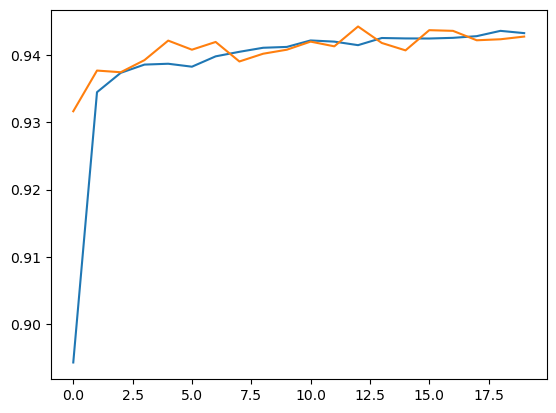

In [15]:
h = hist_ANN.history
h.keys()
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.show()

In [46]:
df_hist_ANN = pd.DataFrame(hist_ANN.history)
df_hist_ANN.to_csv('df_hist_ANN.csv')

In [46]:
from tensorflow.keras.models import load_model

# Load the model
ANN = load_model('ANN_V10.keras')

In [47]:
x_test[0]

array([-0.45024726, -0.24726208, -0.77076946, -0.42244728,  1.29731963,
       -0.9562663 , -1.66814771])

In [48]:
new_data = np.array([[-0.45024726, -0.24726208, -0.77076946, -0.42244728,  1.29731963,
       -0.9562663 , -1.66814771]])
#new_data = new_data.reshape(new_data.shape[0], new_data.shape[1])
prediction = ANN.predict(new_data)
predicted_class = np.argmax(prediction, axis=-1)
predicted_crop = encoder.inverse_transform(predicted_class)
print(predicted_crop)

1/1 [==============================] - 0s 67ms/step
['wheat']


In [49]:
encoder.inverse_transform(y_test)[0]

'wheat'

# CNN_V10 ----94.09

In [76]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import  train_test_split


y=Y
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Reshape the input data for CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
CNN_V10 = Sequential()
CNN_V10.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
CNN_V10.add(MaxPooling1D(pool_size=2))
CNN_V10.add(Flatten())
CNN_V10.add(Dense(128, activation='relu'))
#model2.add(Dropout(0.3))
CNN_V10.add(Dense(len(y.unique()), activation='softmax'))

CNN_V10.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
CNN_V10.fit(X_train_reshaped,y_train,epochs = 100,batch_size = 32,validation_data = (X_test_reshaped,y_test))
test_loss, test_accuracy = CNN_V10.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/100
2497/2497 [==============================] - 12s 4ms/step - loss: 0.3573 - accuracy: 0.8914 - val_loss: 0.1461 - val_accuracy: 0.9321
Epoch 2/100
2497/2497 [==============================] - 10s 4ms/step - loss: 0.1432 - accuracy: 0.9296 - val_loss: 0.1336 - val_accuracy: 0.9323
Epoch 3/100
2497/2497 [==============================] - 10s 4ms/step - loss: 0.1360 - accuracy: 0.9322 - val_loss: 0.1386 - val_accuracy: 0.9324
Epoch 4/100
2497/2497 [==============================] - 10s 4ms/step - loss: 0.1285 - accuracy: 0.9344 - val_loss: 0.1269 - val_accuracy: 0.9317
Epoch 5/100
2497/2497 [==============================] - 10s 4ms/step - loss: 0.1245 - accuracy: 0.9358 - val_loss: 0.1298 - val_accuracy: 0.9345
Epoch 6/100
2497/2497 [==============================] - 10s 4ms/step - loss: 0.1228 - accuracy: 0.9357 - val_loss: 0.1196 - val_accuracy: 0.9358
Epoch 7/100
2497/2497 [==============================] - 10s 4ms/step - loss: 0.1191 - accuracy: 0.9374 - val_loss: 0.1161 -

2497/2497 [==============================] - 8s 3ms/step - loss: 0.0983 - accuracy: 0.9439 - val_loss: 0.0994 - val_accuracy: 0.9428
Epoch 58/100
2497/2497 [==============================] - 8s 3ms/step - loss: 0.0976 - accuracy: 0.9429 - val_loss: 0.0980 - val_accuracy: 0.9427
Epoch 59/100
2497/2497 [==============================] - 8s 3ms/step - loss: 0.0980 - accuracy: 0.9434 - val_loss: 0.0998 - val_accuracy: 0.9429
Epoch 60/100
2497/2497 [==============================] - 7s 3ms/step - loss: 0.0979 - accuracy: 0.9438 - val_loss: 0.0965 - val_accuracy: 0.9443
Epoch 61/100
2497/2497 [==============================] - 8s 3ms/step - loss: 0.0995 - accuracy: 0.9431 - val_loss: 0.0970 - val_accuracy: 0.9433
Epoch 62/100
2497/2497 [==============================] - 9s 4ms/step - loss: 0.0980 - accuracy: 0.9439 - val_loss: 0.1001 - val_accuracy: 0.9437
Epoch 63/100
2497/2497 [==============================] - 9s 4ms/step - loss: 0.0984 - accuracy: 0.9437 - val_loss: 0.0967 - val_accuracy

In [16]:
df_hist_CNN = pd.DataFrame(hist_CNN.history)
df_hist_CNN.to_csv("df_hist_CNN.csv")

In [22]:
# Get training accuracy
train_loss, train_accuracy = CNN_V10.evaluate(X_train_reshaped,y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Get testing accuracy
test_loss, test_accuracy = CNN_V10.evaluate(X_test_reshaped,y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 94.48%
Testing Accuracy: 94.36%


In [44]:
CNN_V10.save('CNN_V10.keras')

# loading and testing

In [77]:
from tensorflow.keras.models import load_model

# Load the model
CNN = load_model('CNN_V10.keras')
# Get training accuracy
train_loss, train_accuracy = CNN.evaluate(X_train_reshaped,y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Get testing accuracy
test_loss, test_accuracy = CNN.evaluate(X_test_reshaped,y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 94.48%
Testing Accuracy: 94.36%


In [81]:
#encoder.inverse_transform(y_test)
X_test[0]

array([-0.45024726, -0.24726208, -0.77076946, -0.42244728,  1.29731963,
       -0.9562663 , -1.66814771])

In [82]:
new_data = np.array([[-0.45024726, -0.24726208, -0.77076946, -0.42244728,  1.29731963,
       -0.9562663 , -1.66814771]])
new_data = new_data.reshape(new_data.shape[0], new_data.shape[1],1)
prediction = CNN.predict(new_data)
predicted_class = np.argmax(prediction, axis=-1)
predicted_crop = encoder.inverse_transform(predicted_class)
print(predicted_crop)

1/1 [==============================] - 0s 89ms/step
['wheat']


In [83]:
encoder.inverse_transform(y_test)[0]

'wheat'

# RNN

# LSTM_V10-94.57

In [24]:
x_columns = ['State_Name','N', 'P', 'K', 'pH', 'rainfall', 'temperature']

x_train_df = pd.DataFrame(x_train,columns = x_columns)
x_test_df = pd.DataFrame(x_test,columns = x_columns)
x_train_df = x_train_df.drop('State_Name',axis= 1)
x_test_df= x_test_df.drop('State_Name',axis= 1)
x_train_df

,N,P,K,pH,rainfall,temperature
0,-0.500466,-0.106574,-0.774068,-1.511053,-0.947562,-1.211062
1,0.259146,-0.106574,-0.070827,-0.482635,0.772190,0.340009
2,-1.260078,-0.106574,-0.774068,0.031574,0.745846,0.278240
3,0.259146,-0.106574,-0.070827,-0.284862,-0.898531,-0.174727
4,-0.500466,-0.106574,-0.774068,-1.115508,-0.881867,-0.642794
...,...,...,...,...,...,...
79874,0.259146,-0.106574,-0.070827,-0.403526,-0.334961,-0.339443
79875,1.271962,-0.106574,-0.774068,-0.601298,-0.153596,-0.064917
79876,-1.260078,-0.106574,-0.774068,0.071129,0.304812,0.200250
79877,1.271962,1.221818,0.808224,0.901774,-0.681771,-0.251594


In [90]:
from keras.utils import to_categorical
columns = ['State_Name', 'N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Crop']
data = dataset[columns]

# Encoding categorical columns
state_encoder = LabelEncoder()
data['State_Name'] = state_encoder.fit_transform(data['State_Name'])

# Assuming 'Crop' is the output column, encode it
output_encoder = LabelEncoder()
data['Crop'] = output_encoder.fit_transform(data['Crop'])
num_classes = len(output_encoder.classes_)

# Split dataset into features (X) and labels (y)
X = data.drop(columns=['Crop'])
y = data['Crop']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_test = X_test
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Reshape the input data
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# # Convert labels to categorical if not already
# y_train_cat = to_categorical(y_train, num_classes=num_classes)
# y_test_cat = to_categorical(y_test, num_classes=num_classes)

C:\Users\RAMU GOPI\AppData\Local\Temp\ipykernel_15380\2702284416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State_Name'] = state_encoder.fit_transform(data['State_Name'])
C:\Users\RAMU GOPI\AppData\Local\Temp\ipykernel_15380\2702284416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Crop'] = output_encoder.fit_transform(data['Crop'])


In [43]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from tensorflow.keras.optimizers import Adam
# Define the model
LSTM_V11 = Sequential()
LSTM_V11.add(LSTM(256, input_shape=(1, X_train_reshaped.shape[2]), activation='relu'))
#LSTM_V11.add(Dense(128,activation = 'relu'))
LSTM_V11.add(Dense(num_classes, activation='softmax'))  # Adjust output units and activation for multiclass

# Compile the model
LSTM_V11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
LSTM_V11.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# # Predict the crop
# new_data = np.array([[0.5, 0.3, 0.2, 25, 60, 6.5, 100]])
# new_data = new_data.reshape(new_data.shape[0], 1, new_data.shape[1])
# prediction = LSTM_V10.predict(new_data)
# predicted_class = np.argmax(prediction, axis=-1)
# predicted_crop = output_encoder.inverse_transform(predicted_class)
# print(predicted_crop)

Epoch 1/100
2497/2497 [==============================] - 34s 12ms/step - loss: 0.3306 - accuracy: 0.8964 - val_loss: 0.1369 - val_accuracy: 0.9332
Epoch 2/100
2497/2497 [==============================] - 30s 12ms/step - loss: 0.1331 - accuracy: 0.9329 - val_loss: 0.1329 - val_accuracy: 0.9337
Epoch 3/100
2497/2497 [==============================] - 31s 13ms/step - loss: 0.1231 - accuracy: 0.9363 - val_loss: 0.1220 - val_accuracy: 0.9354
Epoch 4/100
2497/2497 [==============================] - 31s 12ms/step - loss: 0.1166 - accuracy: 0.9379 - val_loss: 0.1142 - val_accuracy: 0.9367
Epoch 5/100
2497/2497 [==============================] - 30s 12ms/step - loss: 0.1121 - accuracy: 0.9400 - val_loss: 0.1086 - val_accuracy: 0.9404
Epoch 6/100
2497/2497 [==============================] - 29s 12ms/step - loss: 0.1072 - accuracy: 0.9407 - val_loss: 0.1031 - val_accuracy: 0.9425
Epoch 7/100
2497/2497 [==============================] - 31s 12ms/step - loss: 0.1047 - accuracy: 0.9419 - val_loss: 0

In [31]:
LSTM_V11.save('LSTM_V11.keras')

In [110]:
from tensorflow.keras.models import load_model

# Load the model
LSTM = load_model('LSTM_V11.keras')
# Get training accuracy
train_loss, train_accuracy = LSTM.evaluate(X_train_reshaped,y_train, verbose=1)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Get testing accuracy
test_loss, test_accuracy = LSTM.evaluate(X_test_reshaped,y_test, verbose=1)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

2497/2497 [==============================] - 9s 3ms/step - loss: 0.0960 - accuracy: 0.9455
Training Accuracy: 94.55%
625/625 [==============================] - 2s 3ms/step - loss: 0.0938 - accuracy: 0.9462
Testing Accuracy: 94.62%


In [107]:
X_test_reshaped[0]

array([[ 1.08362218,  0.00593459, -0.10503347,  0.63419203,  0.90616119,
         0.39659741,  0.47473113]])

In [108]:
new_data = np.array([[ 1.08362218,  0.00593459, -0.10503347,  0.63419203,  0.90616119,
         0.39659741,  0.47473113]])
new_data = new_data.reshape(new_data.shape[0], 1,new_data.shape[1])
prediction = LSTM.predict(new_data)
predicted_class = np.argmax(prediction, axis=-1)
predicted_crop = encoder.inverse_transform(predicted_class)
print(predicted_crop)

1/1 [==============================] - 0s 202ms/step
['cashewnuts']


In [109]:
encoder.inverse_transform(y_test)[0]

'cashewnuts'

# GRU_V10-94.69

In [148]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, GRU, LeakyReLU
from keras.initializers import he_normal
from keras.optimizers import Adam

# Splitting the data into training and testing sets
X_traint, X_testt, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scale = StandardScaler()
X_train = scale.fit_transform(X_traint)
# new_scaler = joblib.load('C:/Users/RAMU GOPI/AA-Major Project/all models/ML models/ml_saved_models/scalerV1.0.pkl')
# X_test = new_scaler.transform(X_test)
X_test = scale.transform(X_testt)
# Reshape data for GRU input (samples, timesteps, features)
time_steps = 1  # Set the time steps to 1 for each sample
num_features = X_train.shape[1]  # Number of features in X

X_train_reshaped = X_train.reshape(X_train.shape[0], time_steps, num_features)
X_test_reshaped = X_test.reshape(X_test.shape[0], time_steps, num_features)

# GRU_V11 = Sequential()
# GRU_V11.add(GRU(256, input_shape=(1, X_train.shape[1]), kernel_initializer=he_normal(), activation=LeakyReLU(alpha=0.03), return_sequences=True))
# GRU_V11.add(GRU(128, activation=LeakyReLU(alpha=0.03)))  # Additional GRU layer
# #model2.add(Dense(64, activation=LeakyReLU(alpha=0.03)))
# GRU_V11.add(Dense(53, activation='sigmoid'))
# GRU_V11.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.03), metrics=['accuracy'])
# GRU_V11.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100


C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


KeyboardInterrupt: 

In [36]:
GRU_V11.save('GRU_V11.keras')

In [88]:
from tensorflow.keras.models import load_model

# Load the model
GRU = load_model('GRU_V11.keras')

In [89]:
#Get training accuracy
train_loss, train_accuracy = GRU.evaluate(X_train_reshaped,y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Get testing accuracy
test_loss, test_accuracy = GRU.evaluate(X_test_reshaped,y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 94.27%
Testing Accuracy: 94.48%


In [106]:
X_test[1005]

array([-1.46810162,  0.51172198, -1.43524375,  2.74656705, -1.19586897,
        2.42048112, -0.61171255])

,State_Name,N,P,K,pH,rainfall,temperature
70848,3,90,20,120,5.04,2169.32,23.736364


In [99]:
scaler.transform([[12,80,40,40,5.38,516.68,27.866667]])

C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.55244493,  0.25914583, -0.10657366, -0.0708268 , -0.52218941,
        -0.30385077,  0.24392473]])

In [107]:
new_data = np.array([[-1.46810162,  0.51172198, -1.43524375,  2.74656705, -1.19586897,
        2.42048112, -0.61171255]])
new_data = new_data.reshape(new_data.shape[0], 1,new_data.shape[1])
prediction = GRU.predict(new_data)
predicted_class = np.argmax(prediction, axis=1)
predicted_crop = encoder.inverse_transform(predicted_class)
print(predicted_crop)

1/1 [==============================] - 0s 56ms/step
['apple']


In [105]:
encoder.inverse_transform(y_test)[1005]

'sweetpotato'

In [108]:
predicted_class

array([0], dtype=int64)

# Ensemble Voting Classifier try running in Google Colab

In [1]:
!pip install scikeras

In [2]:
from sklearn.ensemble import VotingClassifier
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, LeakyReLU, Dropout
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from keras.initializers import he_normal
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

dataset = pd.read_csv("D:/SEM/7th sem/major project/review-2.0/archive10MB/Crop_production.csv")
#dataset = pd.read_csv("Crop_production.csv")  # Replace with your dataset path
columns = ['State_Name', 'N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Crop']
data = dataset[columns]

# Encoding categorical columns
le = LabelEncoder()
data['State_Name'] = le.fit_transform(data['State_Name'])

# Assuming 'Crop' is the output column, encode it
output_encoder = LabelEncoder()
data['Crop'] = output_encoder.fit_transform(data['Crop'])
num_classes = len(output_encoder.classes_)

# Split dataset into features (X) and labels (y)
X = data.drop(columns=['Crop'])
y = data['Crop']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
time_steps = 1  # Set the time steps to 1 for each sample
num_features = X_train.shape[1]  # Number of features in X

X_train_reshaped = X_train.reshape(X_train.shape[0], time_steps, num_features)
X_test_reshaped = X_test.reshape(X_test.shape[0], time_steps, num_features)


# # Example dataset (replace this with your dataset)
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create LSTM model
def create_lstm_model():
    LSTM_V11 = Sequential()
    LSTM_V11.add(LSTM(256, input_shape=(1, X_train_reshaped.shape[2]), activation='relu'))
    #model.add(Dense(128,activation = 'relu'))
    LSTM_V11.add(Dense(53, activation='softmax'))  # Adjust output units and activation for multiclass
    # Compile the model
    LSTM_V11.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return LSTM_V11



# Function to create GRU model
def create_gru_model():
    GRU_V11 = Sequential()
    GRU_V11.add(GRU(256, input_shape=(1, X_train_reshaped.shape[2]), kernel_initializer=he_normal(), activation=LeakyReLU(alpha=0.03), return_sequences=True))
    GRU_V11.add(GRU(128, activation=LeakyReLU(alpha=0.03)))  # Additional GRU layer
    #model2.add(Dense(64, activation=LeakyReLU(alpha=0.03)))
    GRU_V11.add(Dense(53, activation='sigmoid'))
    GRU_V11.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.03), metrics=['accuracy'])
    return GRU_V11
def create_ann_model():
    ANN_V11 = Sequential()
    # Add layers
    ANN_V11.add(Dense(128, input_shape=(1, X_train_reshaped.shape[2]), activation='relu'))
    ANN_V11.add(Dense(64, activation='relu'))
    ANN_V11.add(Dense(32, activation='relu'))
    ANN_V11.add(Dense(53, activation='softmax'))  # Softmax for multi-class classification
    # Compile the model
    ANN_V11.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return ANN_V11

C:\Users\RAMU GOPI\AppData\Local\Temp\ipykernel_15380\2262802088.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State_Name'] = le.fit_transform(data['State_Name'])
C:\Users\RAMU GOPI\AppData\Local\Temp\ipykernel_15380\2262802088.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Crop'] = output_encoder.fit_transform(data['Crop'])


In [ ]:
# Train the ANN model
ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=32, verbose=1)
ann_classifier.fit(X_train_reshaped, y_train)

# Train the LSTM model
lstm_classifier = KerasClassifier(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=1)
lstm_classifier.fit(X_train_reshaped, y_train)

# Train the GRU model
gru_classifier = KerasClassifier(build_fn=create_gru_model, epochs=100, batch_size=32, verbose=1)
gru_classifier.fit(X_train_reshaped, y_train)
import joblib
# Save the models
joblib.dump(ann_classifier, 'ann_classifier_100epV13.pkl')
joblib.dump(lstm_classifier, 'lstm_classifier_100epV13.pkl')
joblib.dump(gru_classifier, 'gru_classifier_100epV13.pkl')

In [ ]:
# ann_classifier = joblib.load('ann_classifier_100epV13.pkl')
# lstm_classifier = joblib.load('lstm_classifier_100epV13.pkl')
# gru_classifier = joblib.load('gru_classifier_100epV13.pkl')

In [ ]:
# Wrap the trained models into KerasClassifier
ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=32, verbose=1)
lstm_classifier = KerasClassifier(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=1)
gru_classifier = KerasClassifier(build_fn=create_gru_model, epochs=100, batch_size=32, verbose=1)

# Initialize VotingClassifier
models = [('LSTM', lstm_classifier), ('GRU', gru_classifier),('ANN', ann_classifier)]
voting_classifier = VotingClassifier(estimators=models, voting='soft') # 'soft' for probabilities

# Train the VotingClassifier
voting_classifier.fit(X_train_reshaped, y_train)

In [ ]:
# Evaluate the VotingClassifier
accuracy = voting_classifier.score(X_test_reshaped, y_test)
print(f"Voting Classifier Accuracy: {accuracy * 100:.2f}%")

In [ ]:
#save the model
import joblib
joblib.dump(voting_classifier, 'voting_classifier_100epV12.pkl')

In [3]:
import joblib
#voting_classifier = joblib.load('voting_classifier_V12.pkl')
voting_classifier = joblib.load('voting_classifier_100epV12.pkl')
# Make predictions on new data
X_new = X_test_reshaped
# Evaluate the VotingClassifier
accuracy = voting_classifier.score(X_new, y_test)
print(f"Voting Classifier Accuracy: {accuracy * 100:.2f}%")

C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator OrdinalEncoder from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.2.2 when using version 1.3.0. This might lead to brea

625/625 [==============================] - 2s 3ms/step
Voting Classifier Accuracy: 94.82%


In [53]:
X_new[:2]

array([[[ 1.08362218,  0.00593459, -0.10503347,  0.63419203,
          0.90616119,  0.39659741,  0.47473113]],

       [[ 1.28776009,  0.00593459, -0.10503347,  0.10609828,
         -0.20434531, -1.03483351, -0.83080451]]])

In [54]:
new_data = [[list(X_test[0:1][0])],[list(X_test[0:1][0])]]
new_data = np.array(new_data)
new_data

array([[[ 1.08362218,  0.00593459, -0.10503347,  0.63419203,
          0.90616119,  0.39659741,  0.47473113]],

       [[ 1.08362218,  0.00593459, -0.10503347,  0.63419203,
          0.90616119,  0.39659741,  0.47473113]]])

In [56]:
#new_data = new_data.reshape(1,7)
new_data = new_data.reshape(2,1,7)
new_data.shape

(2, 1, 7)

In [57]:
voting_classifier.predict(new_data)

1/1 [==============================] - 0s 41ms/step


array([14, 14], dtype=int64)

In [60]:
print(output_encoder.inverse_transform(voting_classifier.predict(new_data))[0])
print(output_encoder.inverse_transform(y_test[:1])[0])

1/1 [==============================] - 0s 48ms/step
cashewnuts
cashewnuts


In [ ]:
def dl_voting_predictions(data):#data = list(7 params)
    

In [8]:
from sklearn.ensemble import VotingClassifier
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, LeakyReLU, Dropout
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from keras.initializers import he_normal
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

dataset = pd.read_csv("D:/SEM/7th sem/major project/review-2.0/archive10MB/Crop_production.csv")
#dataset = pd.read_csv("Crop_production.csv")  # Replace with your dataset path
columns = ['State_Name', 'N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Crop']
data = dataset[columns]

# Encoding categorical columns
le = LabelEncoder()
data['State_Name'] = le.fit_transform(data['State_Name'])

# Assuming 'Crop' is the output column, encode it
output_encoder = LabelEncoder()
data['Crop'] = output_encoder.fit_transform(data['Crop'])
num_classes = len(output_encoder.classes_)

# Split dataset into features (X) and labels (y)
X = data.drop(columns=['Crop'])
y = data['Crop']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale = StandardScaler()
# X_train = scale.fit_transform(X_train)
import joblib
scaler = joblib.load("C:/Users/RAMU GOPI/AA-Major Project/all models/ML models/ml_saved_models/scalerV1.0.pkl")
X_test = scaler.transform(X_test)
time_steps = 1  # Set the time steps to 1 for each sample
num_features = X_train.shape[1]  # Number of features in X

X_train_reshaped = X_train.to_numpy().reshape(X_train.shape[0], time_steps, num_features)
X_test_reshaped = X_test.reshape(X_test.shape[0], time_steps, num_features)
def create_lstm_model():
    LSTM_V10 = Sequential()
    LSTM_V10.add(LSTM(256, input_shape=(1, X_train_reshaped.shape[2]), activation='relu'))
    #model.add(Dense(128,activation = 'relu'))
    LSTM_V10.add(Dense(53, activation='softmax'))  # Adjust output units and activation for multiclass
    # Compile the model
    LSTM_V10.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return LSTM_V10



# Function to create GRU model
def create_gru_model():
    GRU_V10 = Sequential()
    GRU_V10.add(GRU(256, input_shape=(1, X_train_reshaped.shape[2]), kernel_initializer=he_normal(), activation=LeakyReLU(alpha=0.03), return_sequences=True))
    GRU_V10.add(GRU(128, activation=LeakyReLU(alpha=0.03)))  # Additional GRU layer
    #model2.add(Dense(64, activation=LeakyReLU(alpha=0.03)))
    GRU_V10.add(Dense(53, activation='sigmoid'))
    GRU_V10.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.03), metrics=['accuracy'])
    return GRU_V10
def create_ann_model():
    ANN_V10 = Sequential()
    # Add layers
    ANN_V10.add(Dense(128, input_shape=(1, X_train_reshaped.shape[2]), activation='relu'))
    ANN_V10.add(Dense(64, activation='relu'))
    ANN_V10.add(Dense(32, activation='relu'))
    ANN_V10.add(Dense(53, activation='softmax'))  # Softmax for multi-class classification
    # Compile the model
    ANN_V10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return ANN_V10

C:\Users\RAMU GOPI\AppData\Local\Temp\ipykernel_20388\4180085951.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State_Name'] = le.fit_transform(data['State_Name'])
C:\Users\RAMU GOPI\AppData\Local\Temp\ipykernel_20388\4180085951.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Crop'] = output_encoder.fit_transform(data['Crop'])


In [9]:
import joblib
#voting_classifier = joblib.load('voting_classifier_V12.pkl')
voting_classifier = joblib.load('voting_classifier_100epV12.pkl')
# Make predictions on new data
X_new = X_test_reshaped
# Evaluate the VotingClassifier
accuracy = voting_classifier.score(X_new, y_test)
print(f"Voting Classifier Accuracy: {accuracy * 100:.2f}%")

C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator OrdinalEncoder from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.2.2 when using version 1.3.0. This might lead to brea

625/625 [==============================] - 2s 3ms/step
Voting Classifier Accuracy: 94.82%


In [31]:
models = ['ann_classifier_100epV13',"lstm_classifier_100epV13",'gru_classifier_100epV13',"voting_classifier_100epV12"]

In [76]:
import joblib,shutil,os
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
crops = ['apple', 'arecanut', 'ashgourd', 'banana', 'barley', 'beetroot',
       'bittergourd', 'blackgram', 'blackpepper', 'bottlegourd',
       'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
       'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber',
       'drumstick', 'garlic', 'ginger', 'grapes', 'horsegram',
       'jackfruit', 'jowar', 'jute', 'ladyfinger', 'maize', 'mango',
       'moong', 'onion', 'orange', 'papaya', 'pineapple', 'pomegranate',
       'potato', 'pumpkin', 'radish', 'ragi', 'rapeseed', 'rice',
       'ridgegourd', 'sesamum', 'soyabean', 'sunflower', 'sweetpotato',
       'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat']
states = ['andaman and nicobar islands', 'andhra pradesh',
       'arunachal pradesh', 'assam', 'bihar', 'chandigarh',
       'chhattisgarh', 'dadra and nagar haveli', 'goa', 'gujarat',
       'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry',
       'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana',
       'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']
# def prediction(model_name,new_data):
#     #temp = #extract temperature from state
#     new_data[0] = states.index(new_data[0])
#     new_scaler = joblib.load('C:/Users/RAMU GOPI/AA-Major Project/all models/ML models/ml_saved_models/scalerV1.0.pkl')
#     new_data = new_scaler.transform([new_data])
#     new_data = new_data.reshape(1,1,len(new_data[0]))
#     model = load_model(f"D:/SEM/7th sem/major project/review-2.0/models-V1.1/DL models/ensemble_3 models/{name}.pkl")
#     crop = crops[model.predict(new_data)[0]]
#     return crop
# for name in models:
#     crop = prediction(name,['andaman and nicobar islands',100,40,140,5.86,1925.68,27.0])
#     print(name," : ",crop)

In [72]:
from keras.models import load_model
def data_for_ann_cnn(new_data):
    new_data[0] = states.index(new_data[0])
    new_scaler = joblib.load('C:/Users/RAMU GOPI/AA-Major Project/all models/ML models/ml_saved_models/scalerV1.0.pkl')
    new_data = new_scaler.transform([new_data])
    return new_data
def data_for_LSTM(new_data):
    new_data[0] = states.index(new_data[0])
    new_scaler = joblib.load('C:/Users/RAMU GOPI/AA-Major Project/all models/ML models/ml_saved_models/scalerV1.0.pkl')
    new_data = new_scaler.transform([new_data])
    new_data = new_data.reshape(new_data.shape[0], 1,new_data.shape[1])
    return new_data
def prediction_from_ann(new_data):
    ann_model = load_model("C:/Users/RAMU GOPI/AA-Major Project/all models/DL models/ANN_V10.keras")
    return crops[np.argmax(ann_model.predict(new_data),axis = 1)[0]]
def prediction_from_cnn(new_data):
    cnn_model = load_model("C:/Users/RAMU GOPI/AA-Major Project/all models/DL models/CNN_V10.keras")
    return crops[np.argmax(cnn_model.predict(new_data),axis = 1)[0]]
def prediction_from_lstm(new_data):
    lstm_model = load_model("C:/Users/RAMU GOPI/AA-Major Project/all models/DL models/LSTM_V11.keras")
    return crops[np.argmax(lstm_model.predict(new_data),axis = 1)[0]]

In [73]:
# new_data = data_for_ann(['andaman and nicobar islands',100,40,140,5.86,1925.68,27.0])
# print("recommended Crop from ANN: ",prediction_from_ann(new_data))

In [74]:
dataset.iloc[500:501,]

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
500,500,assam,whole year,onion,120,60,65,6.12,2169.32,23.736364,188.0,504.0,2.680851


In [77]:
new_data = data_for_ann_cnn(["assam",120,60,65,6.12,2169.32,23.736364])
print("recommended Crop from ANN: ",prediction_from_ann(new_data))

C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 341ms/step
recommended Crop from ANN:  onion


In [81]:
new_data = data_for_ann_cnn(["jammu and kashmir",80,40,40,5.38,516.68,27.866667])
print("recommended Crop from CNN: ",prediction_from_cnn(new_data))

C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 180ms/step
recommended Crop from CNN:  rice


In [80]:
new_data = data_for_LSTM(["jammu and kashmir",80,40,40,5.38,516.68,27.866667])
print("recommended Crop from LSTM: ",prediction_from_lstm(new_data))

C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 565ms/step
recommended Crop from LSTM:  rice


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
y_test

30059    14
10182     4
16280    46
54944    47
98212    42
         ..
46645    30
3676     26
44340    34
16423    44
29478    50
Name: Crop, Length: 19970, dtype: int32

In [142]:
X_test.iloc[:1,]

,State_Name,N,P,K,pH,rainfall,temperature
30059,28,70,40,60,6.1,942.8,28.994545


In [153]:
new_scaler = joblib.load('C:/Users/RAMU GOPI/AA-Major Project/all models/ML models/ml_saved_models/scalerV1.0.pkl')
new_data = new_scaler.transform(X_test.iloc[:1,])
# new_data = new_data.reshape(new_data.shape[0], 1,new_data.shape[1])
# prediction_from_gru(new_data)
new_data

array([[ 1.08271776,  0.00594187, -0.10657366,  0.63241418,  0.90177418,
         0.40128621,  0.47614855]])

In [150]:
X_test

array([[ 1.08362218,  0.00593459, -0.10503347, ...,  0.90616119,
         0.39659741,  0.47473113],
       [ 1.28776009,  0.00593459, -0.10503347, ..., -0.20434531,
        -1.03483351, -0.83080451],
       [ 0.98155323, -0.4998528 ,  1.22517681, ..., -0.20434531,
        -0.66794972,  0.59294262],
       ...,
       [-0.14120524, -0.4998528 ,  0.56007167, ...,  0.58887362,
         0.67526672,  0.4031656 ],
       [ 0.98155323, -1.00564019, -1.76779632, ...,  1.69938012,
        -0.66794972,  0.59294262],
       [ 0.77741533, -1.13208703,  1.22517681, ..., -1.15620802,
        -0.24133222,  0.38194013]])

In [85]:
def prediction_from_gru(new_data):
    gru_model = load_model("C:/Users/RAMU GOPI/AA-Major Project/all models/DL models/GRU_V11.keras")
    return crops[np.argmax(gru_model.predict(new_data),axis = 1)[0]]
new_data = data_for_LSTM(["jammu and kashmir",60,30,30,6.11,293.36,14.700000])
prediction_from_gru(new_data)

C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 914ms/step


'bittergourd'

In [83]:
gru_model = load_model("C:/Users/RAMU GOPI/AA-Major Project/all models/DL models/GRU_V11.keras")
crops[np.argmax(gru_model.predict(new_data),axis = 1)[0]]

1/1 [==============================] - 1s 875ms/step


'barley'

In [118]:
new_data.shape

(1, 1, 7)

In [84]:
dataset.iloc[1502:1504,]

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
1502,1502,jammu and kashmir,kharif,rice,80,40,40,5.38,516.68,27.866667,27897.0,626.0,0.022440
1503,1503,jammu and kashmir,rabi,wheat,60,30,30,6.11,293.36,14.700000,645.0,580.0,0.899225


In [103]:
new_data = data_for_LSTM(["jammu and kashmir",80,40,40,5.38,516.68,27.866667])
prediction_from_gru(new_data)

C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 698ms/step


'barley'

In [100]:
new_data

array([[[-1.47222395,  1.27196166,  1.22181793,  0.80822442,
          0.94132873,  2.43091308, -0.6064814 ]]])